# Analyse de données site e-commerce

## Objectif

Le but de cette étude est de réaliser un clustering de clients afin de construire un modèle prédictif des achats.

## Imports 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
import numpy as np
import re  
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import plotly.graph_objects as go
import kmodes
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_samples, silhouette_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grego\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grego\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data= pd.read_csv("data.csv",  encoding = "ISO-8859-1")
data=data.dropna()
data_text= data.Description

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Variables 

* InvoiceNo : Numéro d'achat, pour chaque nouvelle facturation, un nouveau numéro est généré.
* StockCode : Numéro de transaction, pour chaque objet acheté, un numéro est affecté, à la fin de celui-ci, on peut retrouver une lettre donnant des indications sur l'achat, par exemple C signifie que la transaction a été annulée.
* Description : Donne une courte description de l'objet acheté.
* Quantity : Quantitée achetée.
* InvoiceDate : Date d'achat.
* UnitPrice : Prix unitaire.
* CustomerID : Numéro de client, est affecté lors de la création du compte, et ne change pas ensuite.
* Country : Pays dans lequel l'achat a été effectué.

In [3]:
def tokenization_s(sentences): 
    s_new = []
    for sent in (sentences[:]):
        s_token = word_tokenize(sent)
        if s_token != '':
            s_new.append(s_token)
    return s_new

Le principe de la tokenisation est de séparer une phrase en mots, ce qui va permettre d'améliorer la compréhension, de faciliter le nettoyage et donc de pouvoir appliquer cela à des algorithmes de Machine Learning. Par exemple, 'WHITE HANGING HEART T-LIGHT HOLDER' deviendra ['WHITE', 'HANGING', 'HEART', 'T-LIGHT', 'HOLDER']

In [4]:
def maj_stop_words(stop_words, suppw):
    """Met en majuscules la liste des stopwords et rajoute optionnellement des mots à la liste"""
    stop_words_new=[]
    for i in stop_words:
        stop_words_new.append(i.upper())
    if suppw != [] : 
        for i in suppw:
            stop_words_new.append(i.upper())
    return stop_words_new

In [5]:
def remove_stopwords(words, suppw):
    """Retire les Stopwords et la ponctuaction"""
    filtered_sentence=[]
    expression="[A-Za-z]*"
    stop_words = maj_stop_words(list(stopwords.words('english')),suppw)
    i=1
    for i in words:
        for w in i: 
            if w not in stop_words and not w.isdigit() and w not in string.punctuation and re.search(expression,w).group(0)==w : 
                filtered_sentence.append(w) 
            
    return filtered_sentence

Pour continuer le nettoyage, il faut retirer la ponctuation, faire en sorte que tous les mots soient en majuscules ou en minuscule afin que lorsqu'ils seront comparés, qu'ils ne soient pas considérés comme deux mots différents. Mais il reste tout de même beaucoup de mots inutiles qu'il faut supprimer. Pour cela, nous utiliserons une liste de 'Stopwords', une liste pré-construite de mots qui sont à supprimer. 

In [6]:
def best_w(data_clean,n):
    fdist=FreqDist(data_clean)
    fdist1=fdist.most_common(n)
    return fdist1

In [7]:
def cleaner_best(sentences, n, suppw=[]):
    """Nettoie les données, prend en entrée une colonne d'un pd.DataFrame, n le nombre de mots à conserver et optionnellement une liste de mots (stopwords) supplémentaires à supprimer, nommée suppw  """
    data_token=tokenization_s(sentences)
    print("data_token DONE")
    data_clean=remove_stopwords(data_token, suppw)
    print("data_print DONE")
    best_data=best_w(data_clean, n)
    
    return best_data

In [8]:
def cleaner(sentences, suppw=[]):
    """Nettoie les données, prend en entrée une colonne d'un pd.DataFrame, n le nombre de mots à conserver et optionnellement une liste de mots (stopwords) supplémentaires à supprimer, nommée suppw  """
    data_token=tokenization_s(sentences)
    print("data_token DONE")
    data_clean=remove_stopwords(data_token, suppw)
    
    return data_clean

In [9]:
stop_words = list(stopwords.words('english')) 

In [35]:
couleurs=["WHITE","RED","BLUE","PINK","GREEN", "YELLOW", "SET", "TAG", "ORANGE"]

In [11]:
data_wcloud=cleaner(data.Description, couleurs)

data_token DONE


## Wordcloud

Ce graphique représente les 200 mots les plus utilisés.

In [12]:
data_cloud=cleaner_best(data.Description, 200, couleurs)

data_token DONE
data_print DONE


In [13]:
wkc = WordCloud()

In [14]:
data_wcloudC=Counter(data_wcloud)

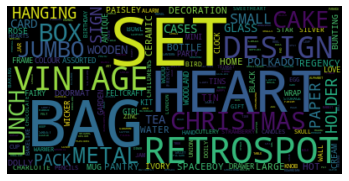

In [15]:
wkc.generate_from_frequencies(data_wcloudC)
plt.imshow(wkc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
list_products = cleaner(data.Description, couleurs)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(list_products)


data_token DONE


In [17]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



Top terms per cluster:
Cluster 0:
 beads
 zinc
 finger
 felt
 feltcraft
 feng
 fern
 field
 fields
 figures
Cluster 1:
 set
 bag
 heart
 retrospot
 design
 christmas
 cake
 jumbo
 metal
 lunch
Cluster 2:
 vintage
 finish
 felt
 feltcraft
 feng
 fern
 field
 fields
 figures
 filigree
Cluster 3:
 box
 finish
 felt
 feltcraft
 feng
 fern
 field
 fields
 figures
 filigree
Cluster 4:
 pack
 zinc
 finish
 felt
 feltcraft
 feng
 fern
 field
 fields
 figures


In [29]:
groupe0=[]
for ind in order_centroids[0, :]:
         groupe0.append(terms[ind])
groupe1=[]
for ind in order_centroids[1, :]:
         groupe1.append(terms[ind])
groupe2=[]
for ind in order_centroids[2, :]:
         groupe2.append(terms[ind])
groupe3=[]
for ind in order_centroids[3, :]:
         groupe3.append(terms[ind])
groupe4=[]
for ind in order_centroids[4, :]:
         groupe4.append(terms[ind])

In [16]:
df_cleaned=data

In [17]:
km = KModes(n_clusters=6, init='Huang', n_init=5, verbose=1)
km.fit(df_cleaned)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 55283, cost: 2499966.0
Run 1, iteration: 2/100, moves: 1364, cost: 2499966.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 90129, cost: 2513975.0
Run 2, iteration: 2/100, moves: 984, cost: 2513975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 39545, cost: 2511347.0
Run 3, iteration: 2/100, moves: 3677, cost: 2511347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 57769, cost: 2525831.0
Run 4, iteration: 2/100, moves: 0, cost: 2525831.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 97603, cost: 2481997.0
Run 5, iteration: 2/100, moves: 67, cost: 2481997.0
Best run was number 5


KModes(init='Huang', n_clusters=6, n_init=5, verbose=1)

In [18]:
clusters = km.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 54677, cost: 2522571.0
Run 1, iteration: 2/100, moves: 1453, cost: 2522571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 52026, cost: 2512335.0
Run 2, iteration: 2/100, moves: 2206, cost: 2512335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 74292, cost: 2516807.0
Run 3, iteration: 2/100, moves: 1514, cost: 2516807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 195234, cost: 2509595.0
Run 4, iteration: 2/100, moves: 60829, cost: 2501293.0
Run 4, iteration: 3/100, moves: 5590, cost: 2501293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 53666, cost: 2510562.0
Run 5, iteration: 2/100, moves: 587, cost: 2510562.0


In [19]:
df_cleaned = df_cleaned.reset_index()

fitClusters = pd.DataFrame(clusters)


clusters_df = pd.DataFrame(fitClusters)
clusters_df.columns = ['clusters_pred']
db_w_clusters = pd.concat([df_cleaned, clusters_df], axis = 1).reset_index()

db_w_clusters = db_w_clusters.drop(['level_0', 'index'], axis = 1)

db_w_clusters.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,clusters_pred
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom,0


In [23]:
groupe0=db_w_clusters[ db_w_clusters['clusters_pred'] == 0 ]
groupe1=db_w_clusters[ db_w_clusters['clusters_pred'] == 1 ]
groupe2=db_w_clusters[ db_w_clusters['clusters_pred'] == 2 ]
groupe3=db_w_clusters[ db_w_clusters['clusters_pred'] == 3 ]
groupe4=db_w_clusters[ db_w_clusters['clusters_pred'] == 4 ]
groupe5=db_w_clusters[ db_w_clusters['clusters_pred'] == 5 ]

In [33]:
data_wcloud_gr0=cleaner(groupe0.Description, couleurs)
data_wcloud_gr1=cleaner(groupe1.Description, couleurs)
data_wcloud_gr2=cleaner(groupe2.Description, couleurs)
data_wcloud_gr3=cleaner(groupe3.Description, couleurs)
data_wcloud_gr4=cleaner(groupe4.Description, couleurs)
data_wcloud_gr5=cleaner(groupe5.Description, couleurs)

data_token DONE
data_token DONE
data_token DONE
data_token DONE
data_token DONE
data_token DONE


In [26]:
data_wcloud_gr0C=Counter(data_wcloud_gr0)
data_wcloud_gr1C=Counter(data_wcloud_gr1)
data_wcloud_gr2C=Counter(data_wcloud_gr2)
data_wcloud_gr3C=Counter(data_wcloud_gr3)
data_wcloud_gr4C=Counter(data_wcloud_gr4)
data_wcloud_gr5C=Counter(data_wcloud_gr5)

In [27]:
def wordclouud(data):
    wkc = WordCloud()
    wkc.generate_from_frequencies(data)
    plt.imshow(wkc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

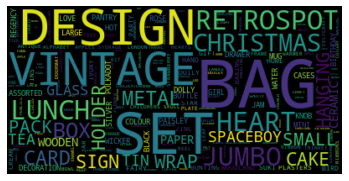

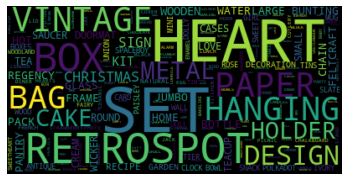

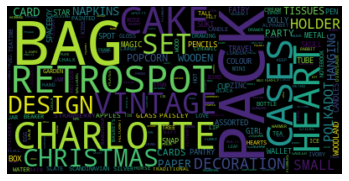

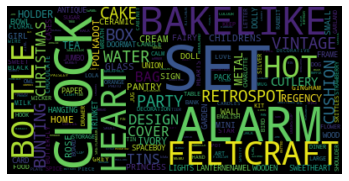

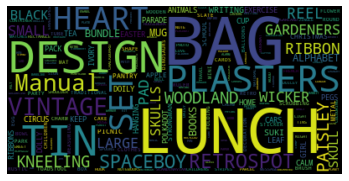

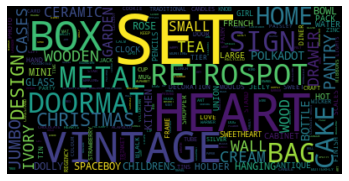

In [34]:
wordclouud(data_wcloud_gr0C)
wordclouud(data_wcloud_gr1C)
wordclouud(data_wcloud_gr2C)
wordclouud(data_wcloud_gr3C)
wordclouud(data_wcloud_gr4C)
wordclouud(data_wcloud_gr5C)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 595, cost: 2646929.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 871, cost: 2586363.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1933, cost: 2547464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3230, cost: 2505312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2452, cost: 2479773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2456, cost: 2471007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2556, cost: 2463249.0
Init: initializing centroids
Init: initializing clusters
Startin

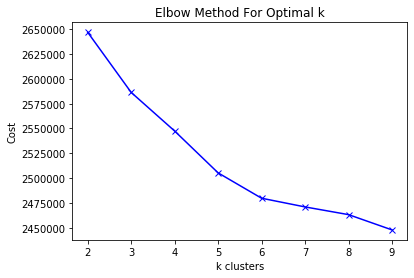

In [31]:
cost = []
K = range(2,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cleaned)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()